### Tesla Stock Price Prediction using Machine Learning

In [2]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r"C:\Users\Downloads\TESLA.csv")

In [4]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...,...
3632,3632,12/3/24,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,3633,12/4/24,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,3634,12/5/24,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,3635,12/6/24,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [8]:
df.shape

(3637, 7)

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3632    False
3633    False
3634    False
3635    False
3636    False
Length: 3637, dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3637 non-null   object 
 1   Open       3637 non-null   float64
 2   High       3637 non-null   float64
 3   Low        3637 non-null   float64
 4   Close      3637 non-null   float64
 5   Adj Close  3637 non-null   float64
 6   Volume     3637 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.0+ KB


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3.637000e+03
mean,80.080574,81.832710,78.219276,80.067952,80.067952,9.667330e+07
std,105.466131,107.807170,102.931208,105.409448,105.409448,7.787314e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,12.046667,12.320000,11.746667,12.065333,12.065333,4.868250e+07
50%,17.833332,18.080000,17.563999,17.846666,17.846666,8.198100e+07
75%,176.070007,179.770004,173.169998,176.880005,176.880005,1.223940e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3632   2024-12-03
3633   2024-12-04
3634   2024-12-05
3635   2024-12-06
3636   2024-12-09
Name: Date, Length: 3637, dtype: datetime64[ns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3637 non-null   datetime64[ns]
 1   Open       3637 non-null   float64       
 2   High       3637 non-null   float64       
 3   Low        3637 non-null   float64       
 4   Close      3637 non-null   float64       
 5   Adj Close  3637 non-null   float64       
 6   Volume     3637 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 199.0 KB


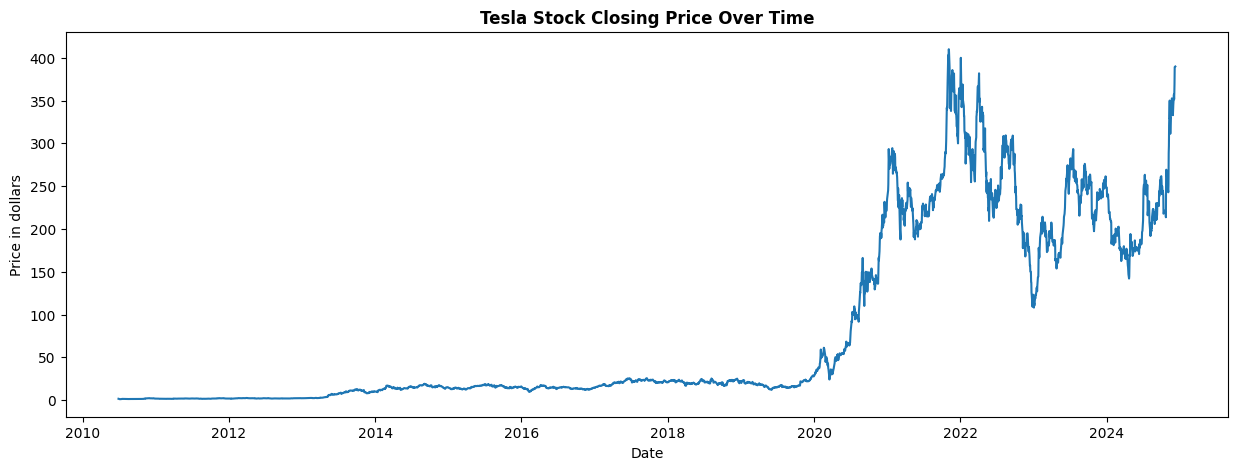

In [16]:
## Stock Prices
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Close'])
plt.title('Tesla Stock Closing Price Over Time', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price in dollars')
plt.show()

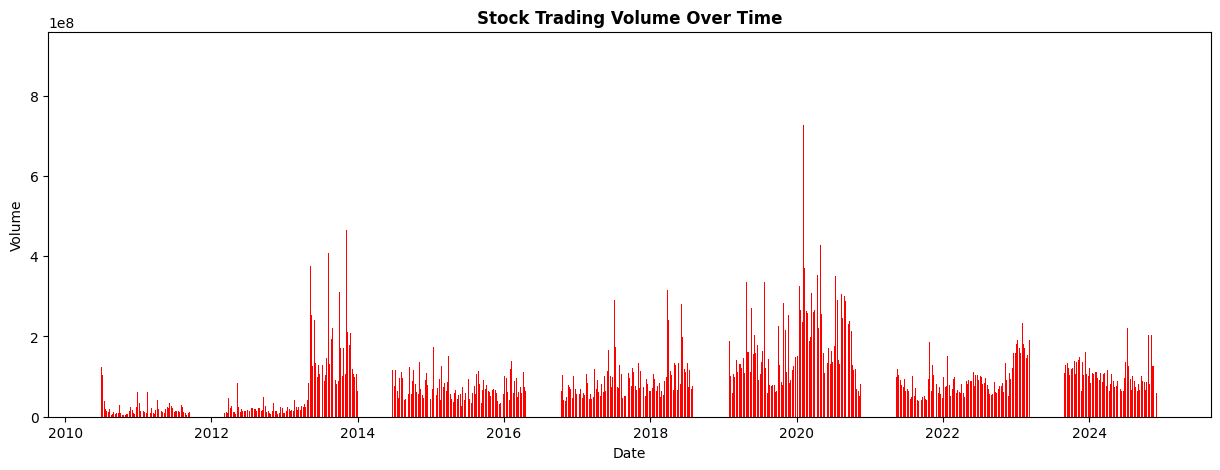

In [17]:
# Volume Plot
plt.figure(figsize=(15, 5))
plt.bar(df['Date'], df['Volume'], color='red')
plt.title('Stock Trading Volume Over Time', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


From the dataset, it can be observed that the data in 'Close' column and that in the 'Adj Close' column is same.

In [19]:
df[df['Close'] == df['Adj Close']].shape

(3637, 7)

In [20]:
# dropping the Adj Close column as all the rows of columns 'Close' and 'Adj Close' have the same data

df.drop(columns=['Adj Close'], inplace=True)

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


In [22]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

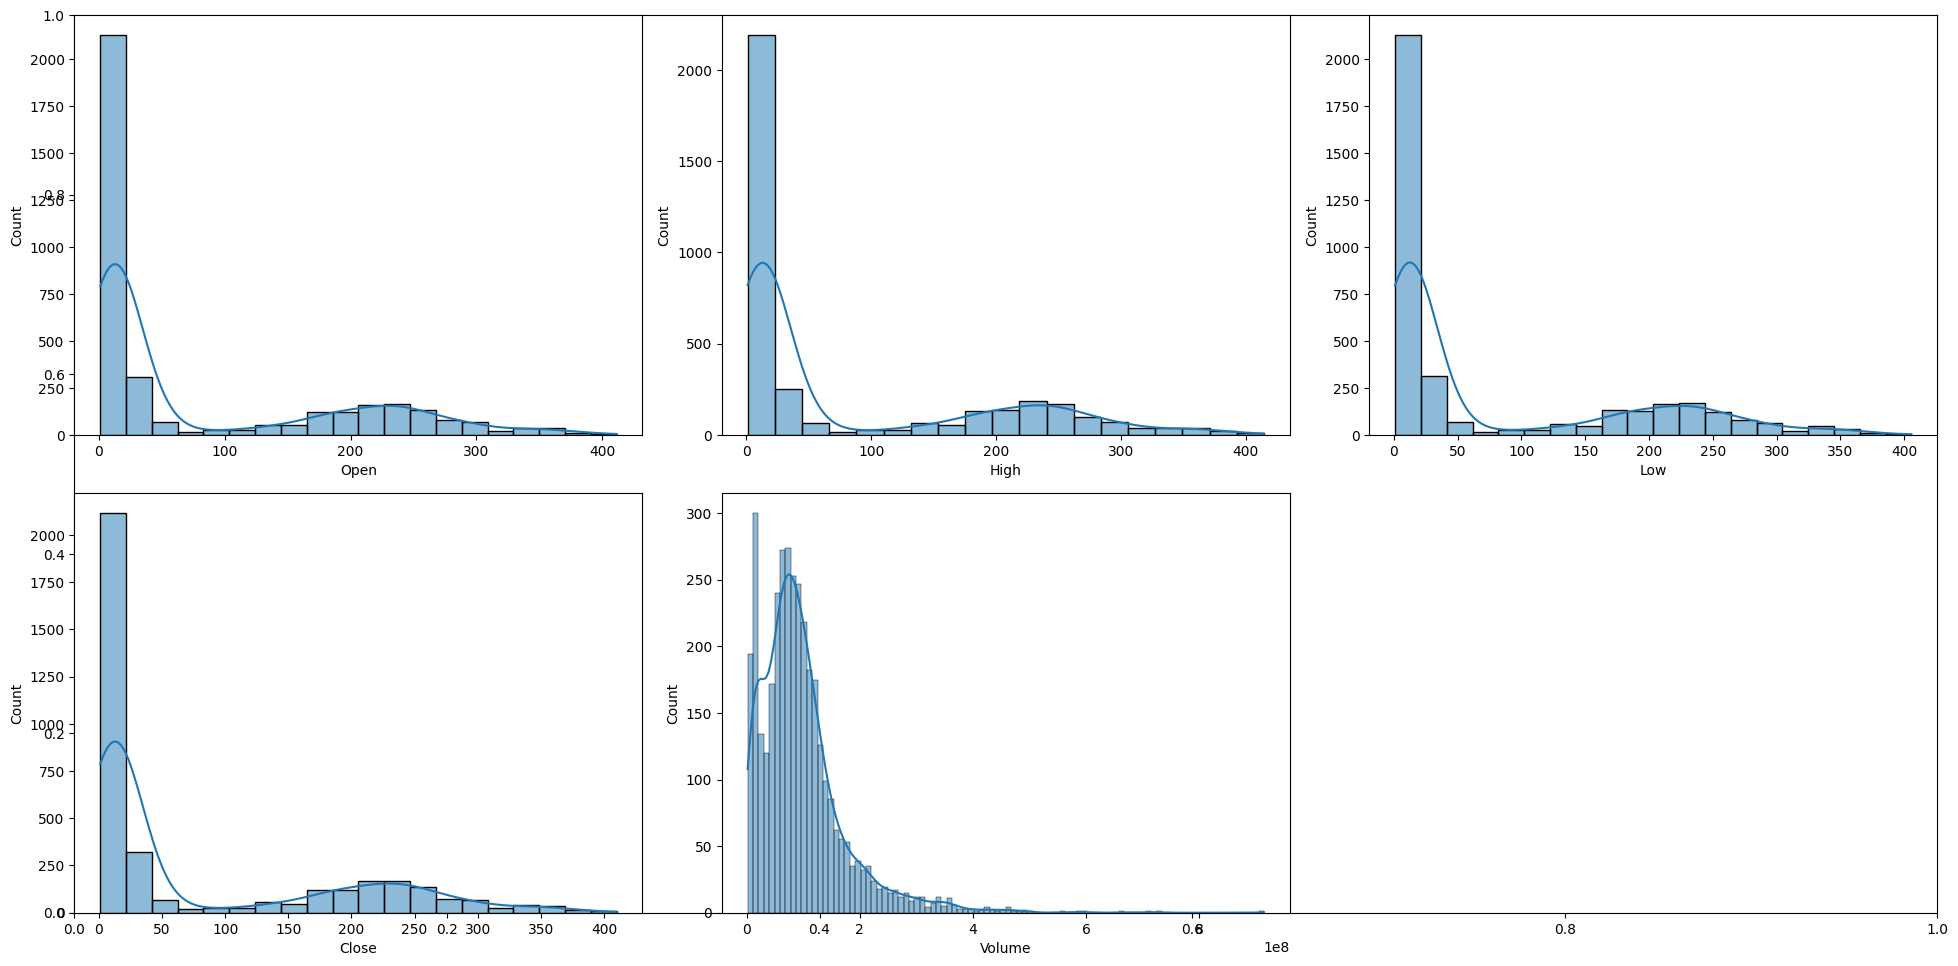

In [23]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

From the above plots, we can observe that there are two peaks means that the data has varied in two regins and the Volume data is right-skewed.

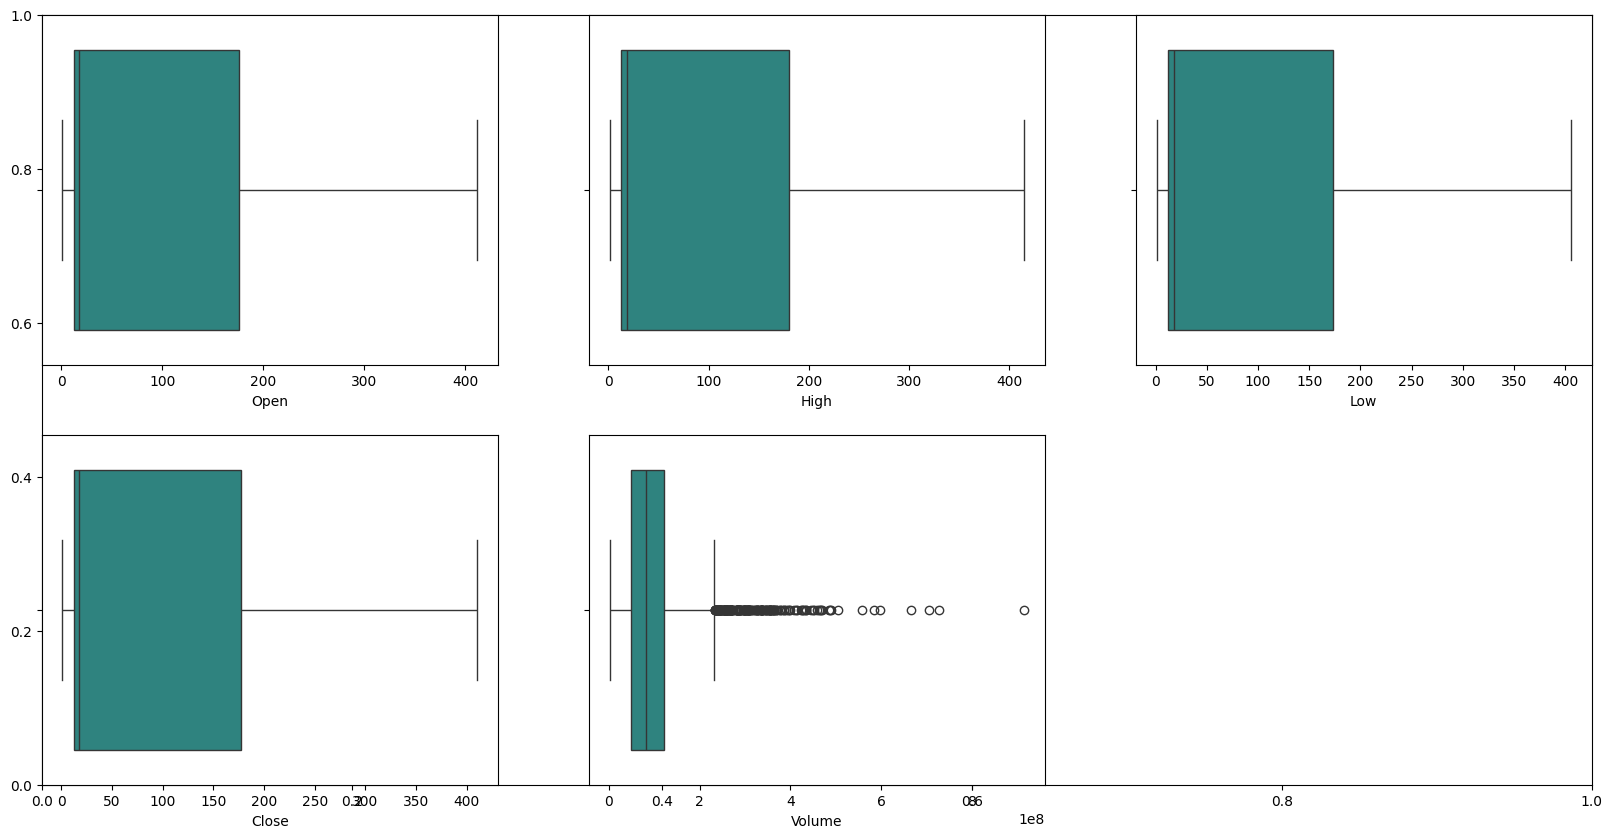

In [24]:
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col], orient='h', palette='viridis')
plt.show()

From the above boxplots, it can be observed that only Volume data contain outliers.

## Feature Engineering

In [25]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,29,6,2010
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,30,6,2010
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,1,7,2010
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,2,7,2010
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,6,7,2010


In [27]:
df['is_quarter_end'] = np.where(df['Month'] % 3 == 0, 1, 0)

In [28]:
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,29,6,2010,1
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,30,6,2010,1
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,1,7,2010,0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,2,7,2010,0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,6,7,2010,0


In [29]:
data_grouped = df.drop('Date', axis=1).groupby('Year').mean()
data_grouped

,Open,High,Low,Close,Volume,Day,Month,is_quarter_end
Year,,,,,,,,
2010,1.560533,1.605149,1.509738,1.556123,2.369643e+07,16.030769,9.453846,0.346154
2011,1.788132,1.825349,1.746278,1.786984,1.935923e+07,15.634921,6.547619,0.345238
2012,2.080208,2.120611,2.036392,2.077907,1.844694e+07,15.776000,6.500000,0.328000
2013,6.961095,7.123534,6.785325,6.960082,1.261158e+08,15.650794,6.543651,0.321429
2014,14.894360,15.163325,14.613741,14.888606,1.037096e+08,15.761905,6.551587,0.337302
2015,15.322130,15.558778,15.084709,15.336193,6.477487e+07,15.750000,6.567460,0.345238
2016,14.003897,14.228899,13.752410,13.984484,6.918820e+07,15.682540,6.555556,0.341270
2017,20.953081,21.230040,20.645798,20.954420,9.502180e+07,15.800797,6.533865,0.338645
2018,21.145564,21.579575,20.703487,21.153995,1.291816e+08,15.796813,6.505976,0.318725


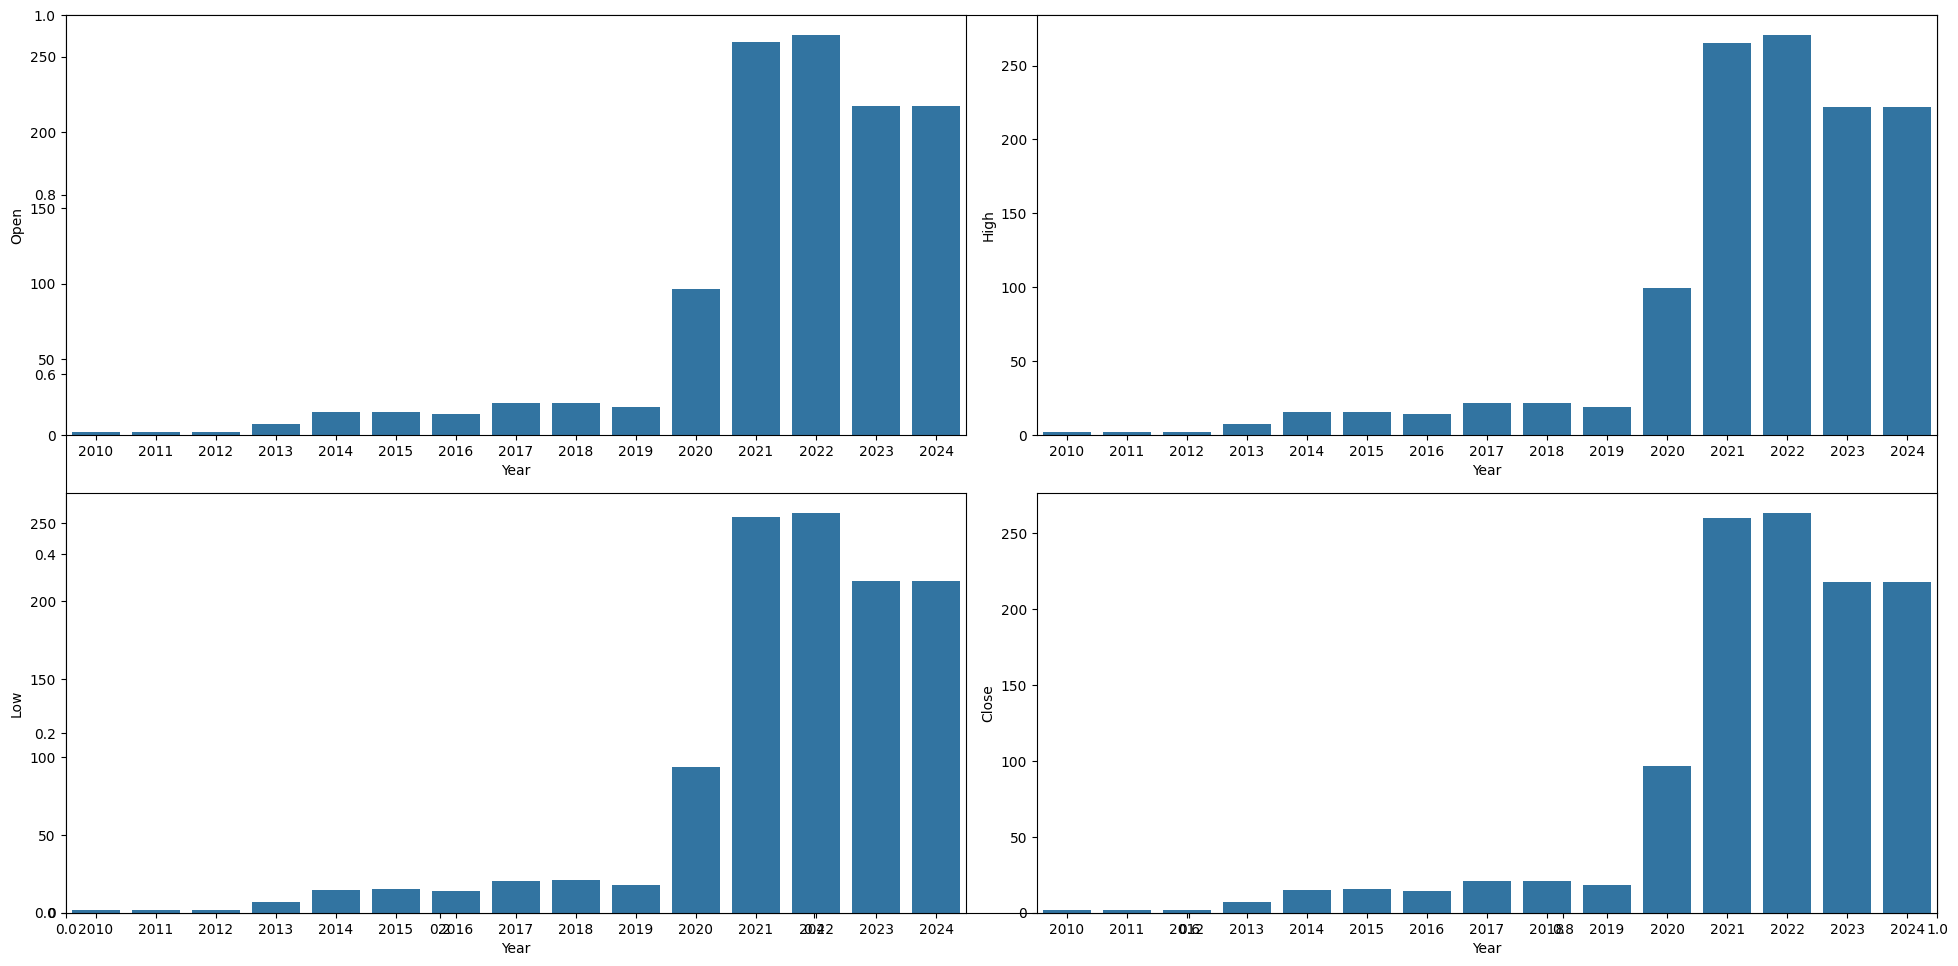

In [30]:
plt.subplots(figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2, i+1)
    sns.barplot(data=data_grouped[col])
    
plt.tight_layout()
plt.show()

In [31]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

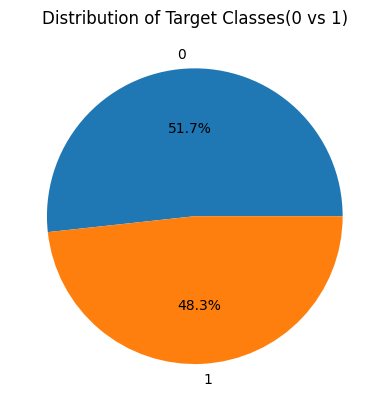

In [88]:
plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.title('Distribution of Target Classes(0 vs 1)')
plt.show()

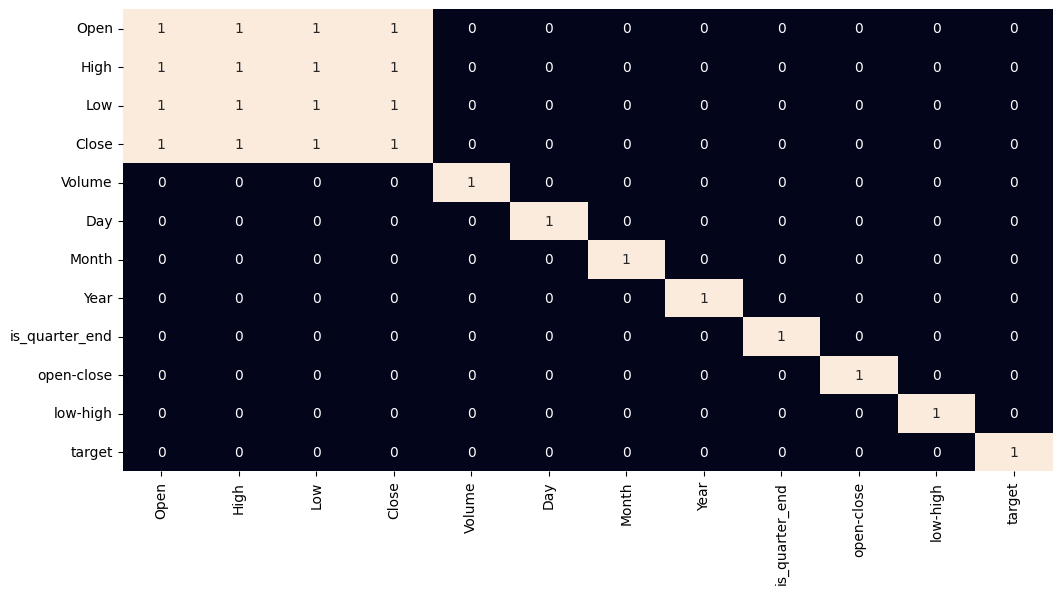

In [87]:
plt.figure(figsize=(12, 6))

sns.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can observe that there is a high correlation between {Open, High, Low, Close}, and the added features are not highly correlated with each other.

## Data Splitting and Normalization

In [78]:
Features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

X_train, X_valid, Y_train, Y_valid = train_test_split(Features, target, test_size=0.1, random_state=2022)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

print(X_train.shape, X_valid.shape)

(3273, 3) (364, 3)


## Model Development and Evaluation

In [ ]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
   
    print(f'{models[i]} : ')
    print('Training Accuracy: ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy: ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy:  0.5207818182090165
Validation Accuracy:  0.5126509661835749

SVC(kernel='poly', probability=True) : 
Training Accuracy:  0.49651754019862593
Validation Accuracy:  0.5276871980676329

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Acc

## Conclusion
Among the three models, XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is high. On the other hand, Logistic Regression provides more stable results, with smaller differences between training and validation accuracy, suggesting it generalizes better.